<a href="https://colab.research.google.com/github/Clinda02/customer_analysis/blob/main/9_customer_segmentation_targeting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 9.고객 세분화 및 타겟 마케팅

* **고객의 구매 빈도와 평균 주문 가치**를 기준으로 **네 가지 세그먼트**로 분류한 경우, 각 세그먼트에 맞는 맞춤형 마케팅 전략을 적용할 수 있음

* 4가지 세그먼트 종류<br>
'High Value - High Frequency' <br>
'High Value - Low Frequency' <br>
'Low Value - High Frequency' <br>
'Low Value - Low Frequency'

#### 그룹별 마케팅
1. **High Value - High Frequency (HVHF)**<br>
* 특징: 이 그룹의 고객들은 높은 주문 가치와 빈번한 구매 행동을 보임.
* 추천 마케팅 전략: _**로열티 프로그램**_: 이들은 이미 브랜드에 충성도가 높은 고객군. 로열티 포인트, VIP 서비스 등을 제공하여 이들의 충성도를 더욱 강화.
* 업셀링 및 크로스셀링: 관련 제품이나 더 고가의 제품을 제안하여 구매를 유도.
* 개인화된 커뮤니케이션: 이메일 마케팅, SMS 등을 통해 개인화된 제안과 정보를 제공.

2. **High Value - Low Frequency (HVLF)**<br>
* 특징: 높은 주문 가치를 보이지만 구매 빈도는 낮은 고객군.
* 추천 마케팅 전략: _**재구매 유도**_: 할인 쿠폰, 한정 판매 제품 정보 등을 제공하여 재구매를 유도.
* 이벤트 초대: 특별 이벤트나 신제품 출시 행사에 이들을 초대하여 관심을 유도.
* 피드백 요청: 제품이나 서비스에 대한 피드백을 요청하여 관계를 강화하고, 개선점을 찾음.

3. **Low Value - High Frequency (LVHF)**<br>
* 특징: 자주 구매하지만 주문 가치는 낮은 고객군.
* 추천 마케팅 전략: _**가치 제안 강화**_: 더 높은 가치의 제품을 합리적인 가격에 제안하여 평균 주문 가치를 높임.
* 번들 판매: 관련 제품을 함께 묶어서 판매하여 더 높은 가치의 구매를 유도.
* 교육 및 정보 제공: 제품 사용법, 관련 정보를 제공하여 제품에 대한 인식을 높이고, 더 높은 가치 제품으로의 이동을 유도.

4. **Low Value - Low Frequency (LVLF)**<br>
* 특징: 낮은 주문 가치와 드문 구매 행동을 보이는 고객군.
* 추천 마케팅 전략: _**인식 향상 캠페인**_: 브랜드 인식을 높이기 위한 마케팅 캠페인을 진행.
* 입문 제품 제안: 저렴한 가격의 입문 제품을 제안하여 제품에 대한 관심을 유도.
* 소셜 미디어 마케팅: 소셜 미디어를 통해 브랜드와 제품에 대한 인식을 증가.



In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

conn = mysql.connector.connect(
  host = 'localhost',
  user = 'root',
  password = 'password',
  database = 'classicmodels'
)

# 커서 연결
cursor = conn.cursor()

# 고객 구매 빈도 및 평균 금액 SQL 쿼리 실행
query = """
SELECT
    c.customerNumber,
    COUNT(o.orderNumber) AS orderCount,
    AVG(od.quantityOrdered * od.priceEach) AS avgOrderValue
FROM customers c
JOIN orders o ON c.customerNumber = o.customerNumber
JOIN orderdetails od ON od.orderNumber = o.orderNumber
GROUP BY c.customerNumber
ORDER BY orderCount DESC, AvgOrderValue DESC;
"""

# 데이터프레임 생성 > cursor 이용
cursor.execute(query)

# 데이터 프레임 반환
columns = [desc[0] for desc in cursor.description]
customer_df = pd.DataFrame(cursor.fetchall(), columns = columns)

customer_df

,customerNumber,orderCount,avgOrderValue
0,141,259,3168.685483
1,124,180,3287.929667
2,114,55,3283.364909
3,119,53,2991.945660
4,187,51,2910.001765
...,...,...,...
93,381,8,3652.147500
94,473,8,3169.790000
95,198,8,2694.282500
96,103,7,3187.765714


In [ ]:
# 커서 및 DB연결 종료
cursor.close()
conn.close()

# 세분화 기준 (중위값median으로 임의 설정)
orderCount_median = customer_df['orderCount'].median()
avgOrderValue_median = customer_df['avgOrderValue'].median()

# 세분화 레이블링
customer_df['Segment'] = np.where((customer_df['orderCount'] >= orderCount_median) & (customer_df['avgOrderValue'] >= avgOrderValue_median), 'High Value - High Frequency',
                         np.where((customer_df['orderCount'] < orderCount_median) & (customer_df['avgOrderValue'] >= avgOrderValue_median), 'High Value - Low Frequency',
                         np.where((customer_df['orderCount'] >= orderCount_median) & (customer_df['avgOrderValue'] < avgOrderValue_median), 'Low Value - High Frequency',
                                  'Low Value - Low Frequency')))

# 세그먼트 - 컬러 매핑
color_map = {'High Value - High Frequency' : 'green',
             'High Value - Low Frequency' : 'blue',
             'Low Value - High Frequency' : 'orange',
             'Low Value - Low Frequency' : 'red'}


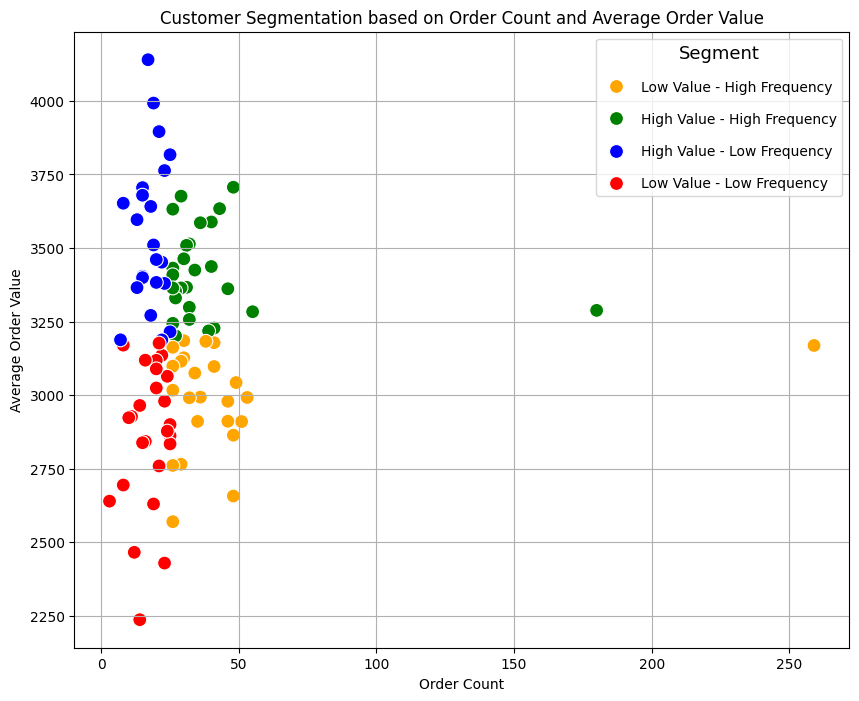

In [ ]:
# 산점도 시각화
plt.figure(figsize=(10,8))
sns.scatterplot(data = customer_df, x = 'orderCount', y='avgOrderValue', hue= 'Segment', palette=color_map, s=100) # s= 원 크기
plt.title('Customer Segmentation based on Order Count and Average Order Value')
plt.xlabel('Order Count')
plt.ylabel('Average Order Value')
plt.legend(title = 'Segment', title_fontsize = 13, labelspacing=1.3)
plt.grid()
plt.show()

#### 인사이트 도출
* 고객을 4개의 세그먼트로 나누어서 분류
* 그룹별 마케팅 전략을 차별화 가능
* OrderCount는 대부분 50 회 미만, but, 150, 250회 이상 구매한 소비자가 존재.
